# Introduction

Retailers are always looking for ways to increase their revenue, and one of the easiest ways to do that is by upselling.

Upselling is the practice of offering customers a product or service that is related to the one they’re already purchasing, but at a higher price.

For example, if you’re buying milk at the store, you might see an advertisement for cheese on your way out. Or if you visit Amazon looking up a new pair of headphones, they may offer to sell you an extra set of earbuds in case yours get lost or damaged.

But how can retailers be sure what products will be most likely to sell? That’s where market basket analysis comes in. Market basket analysis helps retailers identify relationships between items that people frequently buy together—and then use those findings to suggest related products when shoppers add items to their baskets.

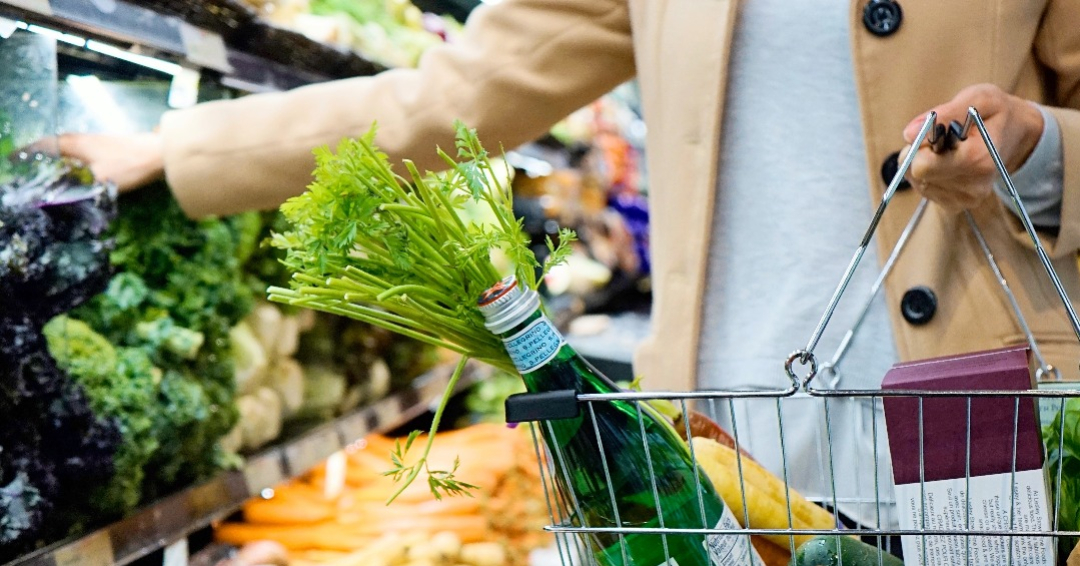

I have a data set of 541,909 transactions that I am going to segment into three groups: low-value customers, medium-value customers, and high-value customers. This will allow me to run market basket analysis on each group to see what each group of customers have in common. This strategy can help a  marketing team create campaigns that are tailored to the specific groups' needs, rather than trying to market to everyone with a single strategy.

Here are the three easy steps I followed for this project :

**- Step 1: Clean the Data (Data Pre-processing )**


**- Step 2:  Customers segmentation using RFM**

**- Step 3 : Use the Apriori Algorithm to figure out the items that are frequently bought together**

## Importing libraries 

In [1]:

import numpy as np
import pandas as pd
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
import time


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.options.mode.chained_assignment = None  # default='warn'

/kaggle/input/online-retail/Online Retail.xlsx
/kaggle/input/retail-store/Retail_store.csv


## Data

I will be using a transactions-based dataset which contains all the transactions occurring for a year for a UK-based, registered non-store online retail. The company mainly sells various gift items. It has various attributes like the Quantity, Invoice number, Description of the product,Invoice date, Customer ID, Country, etc. It is a large dataset with over **520,000** records.

In [2]:
df = pd.read_csv('../input/retail-store/Retail_store.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1. Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Missing values

Let's look at the columns with missing values 


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


Every instance where the description is missing also has the CustomerID missing. Dropping the rows with missing CustomerIDs should also take care of the Description column.

In [8]:
df.dropna(subset=['CustomerID'], inplace=True)

In [9]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Incorrect values

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


"Quantity" cannot have negative values and "UnitPrice" should be at least  greater than 0

In [12]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Duplicate values

In [14]:
print("We have" , df.duplicated().sum(), "duplicates")

We have 5192 duplicates


Taking a closer look at our duplicates:

In [15]:
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


Dropping duplicates

In [16]:
df = df.drop_duplicates()

In [17]:
print("We now have" , df.duplicated().sum(), "duplicates")


We now have 0 duplicates


## Checking for outliers

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


It looks like both "Quantity" and "UnitPrice" have outliers, let us make sure though.

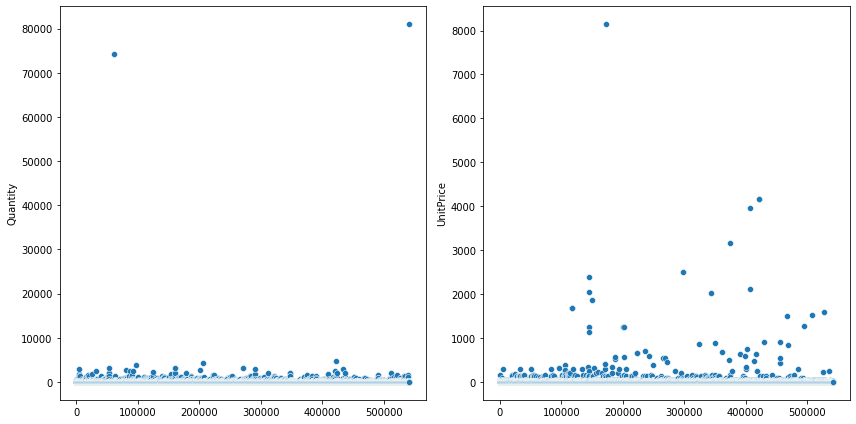

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1 = sns.scatterplot(data=df['Quantity'], ax=ax1)
ax2 = sns.scatterplot(data=df['UnitPrice'], ax=ax2)
plt.tight_layout()

Investigating the Outliers

In [20]:
df[(df['UnitPrice']>5000) | (df['Quantity']>50000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


Deleting these extreme outliers

In [21]:
df = df[(df['UnitPrice']<5000) & (df['Quantity']<50000)]

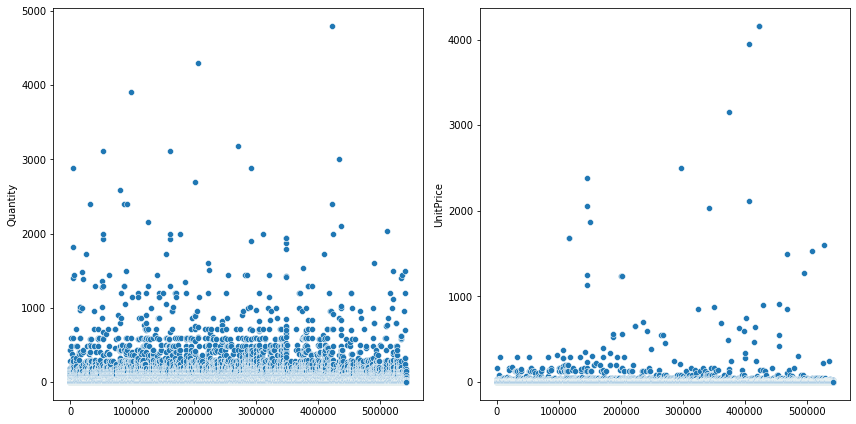

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1 = sns.scatterplot(data=df['Quantity'], ax=ax1)
ax2 = sns.scatterplot(data=df['UnitPrice'], ax=ax2)
plt.tight_layout()

## Date

In [23]:
df['InvoiceDate']

0         2010-12-01 08:26:00
1         2010-12-01 08:26:00
2         2010-12-01 08:26:00
3         2010-12-01 08:26:00
4         2010-12-01 08:26:00
                 ...         
541904    2011-12-09 12:50:00
541905    2011-12-09 12:50:00
541906    2011-12-09 12:50:00
541907    2011-12-09 12:50:00
541908    2011-12-09 12:50:00
Name: InvoiceDate, Length: 392689, dtype: object

As you can see the InvoiceDate column has both the date and time. I will be dividing InvoiceDate into two columns to allow for an easier exploratory data analysis.

In [24]:
df.loc[:,'Date']=pd.DatetimeIndex(df['InvoiceDate']).date
df.loc[:,'Time']=pd.DatetimeIndex(df['InvoiceDate']).time

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


# 2. Customers segmentation using RFM
Recency, Frequency and Monetary Analysis 

RFM analysis is a marketing technique used to quantitatively rank and group customers to identify the best customers and perform targeted marketing campaigns.

There are three main factors that determine the buying behavior of customers: recency, frequency and monetary (RFM). The RFM model is used to segment customers on the basis of their buying patterns with respect to these three parameters. I will attempt to segment customers using these three parameters.

* The **recency** parameter shows how long it has been since a customer last bought from you. This is a good indicator of how likely they are to buy again in the near future.

* The **frequency** parameter shows how many times a customer has purchased from you in total. This is a good indicator of how loyal they are as a customer, and therefore how much money they are likely to spend with you over time.

* The **monetary** parameter shows how much money each customer spends with you. This can be used to identify high-value customers who may warrant special attention and treatment in order to increase their spending.



## Recency

We first need a snapshot day in order to figure out how recent each transaction was. This should be the day after the last transaction

In [26]:
df['Date'].max()

datetime.date(2011, 12, 9)

In [27]:
snapchot_day = df['Date'].max()+datetime.timedelta(1)
snapchot_day

datetime.date(2011, 12, 10)

In [28]:
days_ago_series = (snapchot_day-df['Date']).astype('timedelta64[D]').astype(int)


In [29]:
print("The oldest transaction was",days_ago_series.max(), "days ago")

The oldest transaction was 374 days ago


In [30]:
RFM = df.groupby('CustomerID').agg(Recency=('Date',lambda x :(snapchot_day - x.max())))
RFM

,Recency
CustomerID,
12347.0,3 days
12348.0,76 days
12349.0,19 days
12350.0,311 days
12352.0,37 days
...,...
18280.0,278 days
18281.0,181 days
18282.0,8 days


In [31]:
RFM['Recency'] = RFM['Recency'].astype('timedelta64[D]').astype(int)

Now all customers have their most recent transaction day assigned to them.

## Frequency

In [32]:
RFM['Frequency']= df.groupby('CustomerID').agg(Frequency=('InvoiceNo','count'))

RFM

,Recency,Frequency
CustomerID,,
12347.0,3,182
12348.0,76,31
12349.0,19,73
12350.0,311,17
12352.0,37,85
...,...,...
18280.0,278,10
18281.0,181,7
18282.0,8,12


## Monetary

We first need to calculate the total amount of each transaction

In [33]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34


In [34]:
RFM['Monetary'] = df.groupby('CustomerID').agg(Monetary=('Total','sum'))

RFM

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
12352.0,37,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


Now that we have the values we can give each customer an RFM score.

## RMF Scores


I will use [Pandas Quantile-based discretization](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) function to label/rank each customer. 

**Recency Score**


In [35]:
recency_labels = range(4,0,-1) # notice that the lowest value is given the highest ranking. 

RFM['R_score'] = pd.qcut(RFM['Recency'], q=4,labels=recency_labels)

RFM

,Recency,Frequency,Monetary,R_score
CustomerID,,,,
12347.0,3,182,4310.00,4
12348.0,76,31,1797.24,2
12349.0,19,73,1757.55,3
12350.0,311,17,334.40,1
12352.0,37,85,2506.04,3
...,...,...,...,...
18280.0,278,10,180.60,1
18281.0,181,7,80.82,1
18282.0,8,12,178.05,4


**Frequency Score**


In [36]:
Frequency_labels = range(1,5)

RFM['F_score'] = pd.qcut(RFM['Frequency'], q=4,labels=Frequency_labels)

RFM

,Recency,Frequency,Monetary,R_score,F_score
CustomerID,,,,,
12347.0,3,182,4310.00,4,4
12348.0,76,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,311,17,334.40,1,1
12352.0,37,85,2506.04,3,3
...,...,...,...,...,...
18280.0,278,10,180.60,1,1
18281.0,181,7,80.82,1,1
18282.0,8,12,178.05,4,1


**Monetary Score**



In [37]:
Monetary_labels = range(1,5)

RFM['M_score'] = pd.qcut(RFM['Monetary'], q=4,labels=Monetary_labels)

RFM


,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
12352.0,37,85,2506.04,3,3,4
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,4,1,1


**RFM Total Score**

In [38]:
RFM['rfm_total_score'] = RFM['R_score'].astype(int)+RFM['F_score'].astype(int)+RFM['M_score'].astype(int)

RFM

,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_total_score
CustomerID,,,,,,,
12347.0,3,182,4310.00,4,4,4,12
12348.0,76,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,311,17,334.40,1,1,2,4
12352.0,37,85,2506.04,3,3,4,10
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


**RFM Segments**

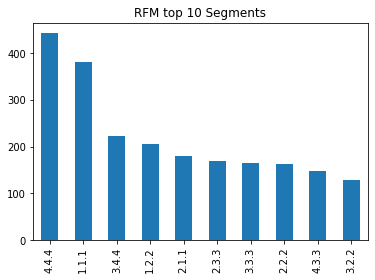

In [39]:
RFM_Segments = (RFM['R_score'].astype(str) + '.'+ RFM['F_score'].astype(str)+'.' + RFM['M_score'].astype(str))
RFM_Segments.value_counts().head(10).plot(kind='bar', title='RFM top 10 Segments')
plt.show()

# adding it to the RFM df
RFM['Segments'] = RFM_Segments

 **Summary metrics per RFM Score**


In [40]:
RFM.groupby('rfm_total_score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','sum']
}).astype(int)

Recency Frequency Monetary         
                   mean      mean     mean      sum
rfm_total_score                                    
3                   261         8      157    59978
4                   177        13      239    92792
5                   152        21      365   190639
6                    95        28      650   297975
7                    80        38      763   349092
8                    64        56      986   454963
9                    46        79     1397   571378
10                   32       110     2065   883924
11                   21       187     4029  1571490
12                    7       371     9393  4161177

As you can see from the summary output above, we have 10 groups. We can group these into 3 groups (Gold, silver, and bronze) using the RFM score.

In [41]:
def group_function(df):
  if df['rfm_total_score']>9:
    return'Gold'
  elif (df['rfm_total_score']>5) and (df['rfm_total_score']<= 9):
    return'Silver'
  else:
    return'Bronze'


In [42]:
RFM['Group']= RFM.apply(group_function,axis=1)
RFM.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_total_score,Segments,Group
CustomerID,,,,,,,,,
12347.0,3,182,4310.00,4,4,4,12,4.4.4,Gold
12348.0,76,31,1797.24,2,2,4,8,2.2.4,Silver
12349.0,19,73,1757.55,3,3,4,10,3.3.4,Gold
12350.0,311,17,334.40,1,1,2,4,1.1.2,Bronze
12352.0,37,85,2506.04,3,3,4,10,3.3.4,Gold



**Summary metrics per RFM Groups**



In [43]:
RFM.groupby('Group').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','sum']
}).astype(int)

Recency Frequency Monetary         
          mean      mean     mean      sum
Group                                     
Bronze     192        15      266   343410
Gold        20       225     5247  6616592
Silver      72        49      937  1673410

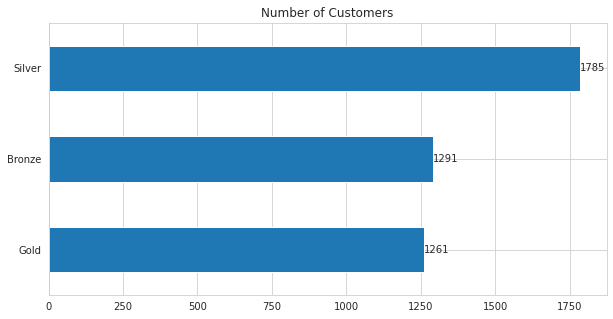

In [44]:
sns.set_style('whitegrid')

ax = RFM['Group'].value_counts().sort_values().plot(kind='barh',figsize=(10,5), title='Number of Customers')


for container in ax.containers:
    ax.bar_label(container)

plt.show()



The first step of the Market Basket Analysis is done! Here is what I did:
- I cleaned the original df by removing duplicates, extreme outliers, and missing values. 
- After giving each customer an RFM score, I was able to assign them into one of the 3 groups (Gold, Silver, and Bronze). 

Next, I'll divide the Data Frame into three new data frames using our three groups (Gold, Silver, and Bronze). This will allow me to further analyze our df and figure out what products customers within each group frequently buy together. This is where the with the Apriori Algorithm comes into play.

# 3. Market Basket Analysis with Apriori Algorithm

Apriori Algorithm is a machine learning algorithm used for mining frequent item-sets and to create association rules from the transaction dataset. It is mostly used for recommendation purposes. The algorithm is based on two principles:

1. An itemset that appears frequently in a transaction set is likely to appear frequently in other transaction sets.

2. A subset of frequent itemsets (i.e., an association rule) rule that describes how two or more items are associated with each other. For example, if you were using association rules to predict which items a certain customer will purchase in a grocery store, an association rule could be "If a customer buys milk, they are likely to buy cereal."

In [45]:
new_df = pd.merge(df,RFM,on='CustomerID')

new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Total,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_total_score,Segments,Group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30,373,297,5391.21,1,4,4,9,1.4.4,Silver
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,9,1.4.4,Silver
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00,373,297,5391.21,1,4,4,9,1.4.4,Silver
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,9,1.4.4,Silver
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,9,1.4.4,Silver


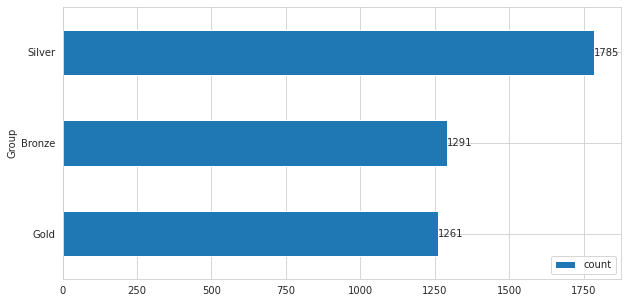

In [46]:
# Just to verify that I merged correctly, I checked if the number of customers in each group of the new_df is the same as before

ax = new_df.groupby('Group').agg(count = ("CustomerID","nunique")).sort_values('count').plot(kind='barh',figsize=(10,5))

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

Looks good, we can move on to dividing the Data Frame into three new dataframes using our three groups (Gold, Silver, and Bronze)

In [47]:
Gold_df = new_df[new_df['Group']=='Gold']
Silver_df = new_df[new_df['Group']=='Silver']
Bronze_df = new_df[new_df['Group']=='Bronze']


In [48]:
Gold_df.shape

(284839, 20)

In [49]:
Silver_df.shape

(88471, 20)

In [50]:
 Bronze_df.shape

(19379, 20)

> ***Note:I will only be applying the algorithm on the Gold dataframe. However, the same exact process I will follow can be applicable to either of the other two dataframes***

## Exploring our high-value customers

In [51]:
Gold_df.size

5696780

In [52]:
Gold_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284839 entries, 297 to 391512
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   InvoiceNo        284839 non-null  object  
 1   StockCode        284839 non-null  object  
 2   Description      284839 non-null  object  
 3   Quantity         284839 non-null  int64   
 4   InvoiceDate      284839 non-null  object  
 5   UnitPrice        284839 non-null  float64 
 6   CustomerID       284839 non-null  float64 
 7   Country          284839 non-null  object  
 8   Date             284839 non-null  object  
 9   Time             284839 non-null  object  
 10  Total            284839 non-null  float64 
 11  Recency          284839 non-null  int64   
 12  Frequency        284839 non-null  int64   
 13  Monetary         284839 non-null  float64 
 14  R_score          284839 non-null  category
 15  F_score          284839 non-null  category
 16  M_score          2

In [53]:
Gold_df.describe()

,Quantity,UnitPrice,CustomerID,Total,Recency,Frequency,Monetary,rfm_total_score
count,284839.000000,284839.000000,284839.000000,284839.000000,284839.000000,284839.000000,284839.000000,284839.000000
mean,13.300215,3.076753,15236.889453,23.229236,16.859321,872.770439,15597.396316,11.410362
std,41.703839,19.887636,1713.678872,76.158832,19.748876,1614.221525,36070.822642,0.758457
min,1.000000,0.040000,12347.000000,0.060000,1.000000,20.000000,316.250000,10.000000
25%,2.000000,1.250000,13956.000000,4.950000,3.000000,164.000000,2248.500000,11.000000
50%,6.000000,1.950000,15034.000000,11.900000,10.000000,299.000000,4017.540000,12.000000
75%,12.000000,3.750000,16764.000000,19.800000,23.000000,587.000000,8910.820000,12.000000
max,4800.000000,4161.060000,18287.000000,7144.720000,141.000000,7676.000000,280206.020000,12.000000


In [54]:
Gold_df.isnull().sum().sum()



0

In [55]:
Gold_df.duplicated().sum()

0

Outliers check

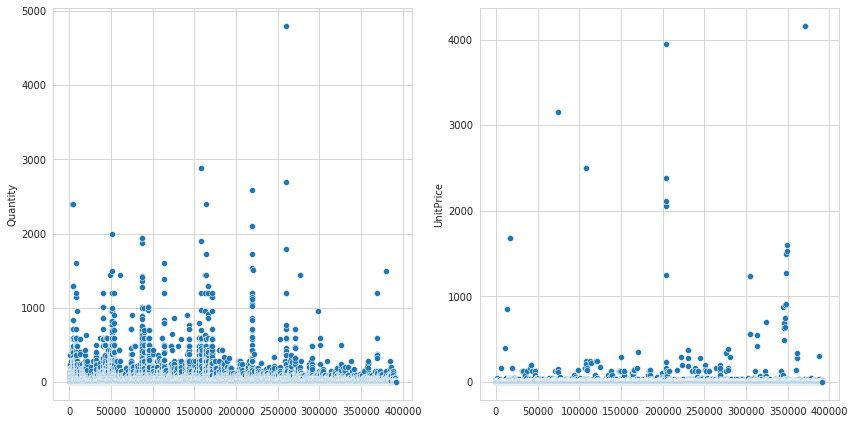

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1 = sns.scatterplot(data=Gold_df['Quantity'], ax=ax1)
ax2 = sns.scatterplot(data=Gold_df['UnitPrice'], ax=ax2)
plt.tight_layout()

> No extreme outliers


**Best selling Product each month**

In [57]:
Gold_df['Month'] = pd.to_datetime(Gold_df['Date']).dt.month

Gold_df.groupby(['Month','Description']).agg(count=('Quantity','count')).sort_values(by='count').groupby(level=0).tail(1)


,,count
Month,Description,
2,SET OF 3 CAKE TINS PANTRY DESIGN,90
4,WHITE HANGING HEART T-LIGHT HOLDER,100
1,WHITE HANGING HEART T-LIGHT HOLDER,102
3,REGENCY CAKESTAND 3 TIER,113
7,LUNCH BAG DOILEY PATTERN,120
8,JUMBO BAG RED RETROSPOT,128
6,PARTY BUNTING,128
10,PAPER CHAIN KIT 50'S CHRISTMAS,141
9,JUMBO BAG VINTAGE DOILY,142


**Number of Transactions per Month**

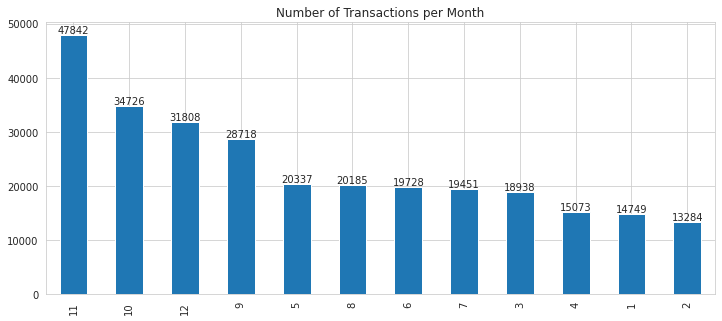

In [58]:
ax = pd.to_datetime(Gold_df['Date']).dt.month.value_counts().plot(kind='bar',figsize=(12,5),title='Number of Transactions per Month')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

>  It looks like the end of year is the best selling season

**Top 5 countries**

In [59]:
countries = pd.DataFrame(Gold_df['Country'].value_counts().head(5)).reset_index()

countries.columns = ['Country','Count']

px.bar(data_frame=countries, x='Country',y='Count').update_layout(title_text='Top 5 countries', title_x=0.5).update_xaxes(tickangle=90)

Note: Éire is Irish for "Ireland"

> This is a UK based Company, it makes sense why most transactionsare in the UK

**The next 5 steps will show you how I transformed my new_df  to prepare it for the Apriori algorithm.**

In [60]:
#Step 1:  group by InvoiceNo and Product, and get the  sum of quantities 

Gold_df.groupby(['InvoiceNo','Description'])['Quantity'].sum()

InvoiceNo  Description                       
536367     ASSORTED COLOUR BIRD ORNAMENT         32
           BOX OF 6 ASSORTED COLOUR TEASPOONS     6
           BOX OF VINTAGE ALPHABET BLOCKS         2
           BOX OF VINTAGE JIGSAW BLOCKS           3
           DOORMAT NEW ENGLAND                    4
                                                 ..
581587     CIRCUS PARADE LUNCH BOX               12
           PACK OF 20 SPACEBOY NAPKINS           12
           PLASTERS IN TIN CIRCUS PARADE         12
           PLASTERS IN TIN STRONGMAN             12
           SPACEBOY LUNCH BOX                    12
Name: Quantity, Length: 281287, dtype: int64

In [61]:
#Step 2 Pivot the table. Not all invoiceNo will have a quantity so we'll have to replace NaN with 0

Gold_df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.0,NaN,NaN,NaN,24.0,NaN,NaN


In [62]:
#Step 3 filling NaN with 0s

Gold_df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0)

Description,InvoiceNo,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12142,581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12143,581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12144,581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,24.0,0.0,0.0
12145,581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#Step 4 : reseting index to InvoiceNo and changing to type 'int'
Gold_set = Gold_df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo').astype(int)
Gold_set

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0
536376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,0,0,0,24,0,0


The dataframe above shows the quantity of product bought for each invoiceID. If no product was bought, the invoiceID will have 0 in that column. Otherwise, it will contain the quantity of products bought. However, the Apriori module requires a dataframe that has either 0 and 1 or True and False as data. **The last step** in this process is to assign 1 to all fields with a value greater than 0.

In [64]:
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

In [65]:
Gold_set = Gold_set.applymap(encode_units)
Gold_set

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
536376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [66]:
# Removing postage becasue it not a product 

Gold_set.drop(columns=['POSTAGE'],inplace=True)

## **Applying Apriori**

In [67]:
# support is number of transactions containing i / by the total number of transactions.

# min_support=0.05 means I only want items that show up at least 5% of the time. 



frequent_gold_itemsets = apriori(Gold_set.astype('bool'), min_support=0.01,use_colnames=True,verbose=1)

frequent_gold_itemsets.sort_values(by='support',ascending=False).head(10)

Processing 420 combinations | Sampling itemset size 5


,support,itemsets
657,0.108916,(WHITE HANGING HEART T-LIGHT HOLDER)
274,0.104635,(JUMBO BAG RED RETROSPOT)
460,0.096485,(REGENCY CAKESTAND 3 TIER)
310,0.088005,(LUNCH BAG RED RETROSPOT)
376,0.079443,(PARTY BUNTING)
41,0.074504,(ASSORTED COLOUR BIRD ORNAMENT)
302,0.070882,(LUNCH BAG BLACK SKULL.)
519,0.067095,(SET OF 3 CAKE TINS PANTRY DESIGN )
311,0.063472,(LUNCH BAG SPACEBOY DESIGN )
593,0.063472,(SPOTTY BUNTING)


How many items in each set ?


In [68]:
frequent_gold_itemsets['size'] = frequent_gold_itemsets['itemsets'].apply(lambda x : len(x))

In [69]:
frequent_gold_itemsets

,support,itemsets,size
0,0.010785,( SET 2 TEA TOWELS I LOVE LONDON ),1
1,0.013666,(10 COLOUR SPACEBOY PEN),1
2,0.017535,(12 PENCIL SMALL TUBE WOODLAND),1
3,0.017947,(12 PENCILS SMALL TUBE RED RETROSPOT),1
4,0.016712,(12 PENCILS SMALL TUBE SKULL),1
...,...,...,...
1417,0.010455,"(LUNCH BAG CARS BLUE, LUNCH BAG WOODLAND, LUNC...",4
1418,0.010291,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG WOODLAN...",4
1419,0.010867,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG WOODLAN...",4
1420,0.010455,"(LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT, ...",4


In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


## **Association Rules**

In [71]:
Gold_rule = association_rules(frequent_gold_itemsets, metric="confidence",min_threshold=0.06)
Gold_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 CAKE CASES DOLLY GIRL DESIGN),(60 TEATIME FAIRY CAKE CASES),0.021734,0.040422,0.010044,0.462121,11.432559,0.009165,1.784005
1,(60 TEATIME FAIRY CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.040422,0.021734,0.010044,0.248473,11.432559,0.009165,1.301704
2,(PACK OF 60 SPACEBOY CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.024862,0.021734,0.010455,0.420530,19.349150,0.009915,1.688208
3,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 60 SPACEBOY CAKE CASES),0.021734,0.024862,0.010455,0.481061,19.349150,0.009915,1.879098
4,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.021734,0.062155,0.011855,0.545455,8.775677,0.010504,2.063258
...,...,...,...,...,...,...,...,...,...
2429,"(LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIGN )","(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG WOODLAND)",0.032107,0.027250,0.010208,0.317949,11.668046,0.009333,1.426213
2430,(LUNCH BAG SPACEBOY DESIGN ),"(LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT, ...",0.063472,0.016218,0.010208,0.160830,9.916767,0.009179,1.172328
2431,(LUNCH BAG WOODLAND),"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG RED RET...",0.055569,0.016465,0.010208,0.183704,11.157244,0.009293,1.204875
2432,(LUNCH BAG RED RETROSPOT),"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG WOODLAN...",0.088005,0.012925,0.010208,0.115996,8.974564,0.009071,1.116596


In [72]:
Gold_rule['size_of_consequents'] = Gold_rule['consequents'].apply(lambda x : len(x))

**The result of association analysis shows which items are frequently purchased together.**

**With this new dataframe, we can ask a lot of questions and run simple queries to answer them. Let's say, for example, we want to figure out what are some of the most popular combinations for our high value customers.**

I run the following query :

In [73]:
Gold_rule[Gold_rule['size_of_consequents']>2].sort_values(by='confidence',ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,size_of_consequents
2125,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.033095,0.018194,0.014242,0.430348,23.653576,0.013640,1.723520,3
2123,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",0.039351,0.015806,0.014242,0.361925,22.897391,0.013620,1.542441,3
2122,(ROSES REGENCY TEACUP AND SAUCER ),"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",0.046596,0.015806,0.014242,0.305654,19.337373,0.013506,1.417439,3


It looks like our customers really like **teacups and cakestands**.

It might have to do with the fact that more than 90% of our customers are from the United Kingdom. The teacup is a symbol of hospitality, friendship and warmness. It's no wonder they love it so much!

I hope our marketing team doesn't miss this.

![](https://tenor.com/view/tea-time-sherlock-benedict-cumberbatch-gif-13612908.gif)